In [1]:
#Import the main libraries. 
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

import seaborn as sns

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


In [2]:
data = pd.read_csv("final_data.csv", index_col="dt_iso")
data.corr()

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all
temp,1.000000,0.006341,-0.801133,0.688277,-0.185884,-0.346875
pressure,0.006341,1.000000,-0.145099,0.055970,-0.118918,-0.093567
humidity,-0.801133,-0.145099,1.000000,-0.669699,0.152411,0.557254
wind_speed,0.688277,0.055970,-0.669699,1.000000,-0.040831,-0.198775
wind_deg,-0.185884,-0.118918,0.152411,-0.040831,1.000000,0.257076
clouds_all,-0.346875,-0.093567,0.557254,-0.198775,0.257076,1.000000


C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


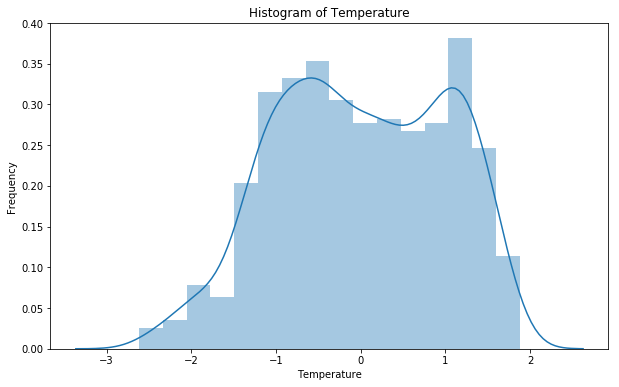

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(data.temp)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature")
plt.savefig("fig4.png")

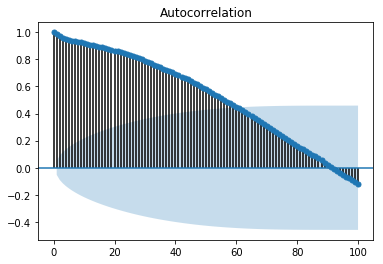

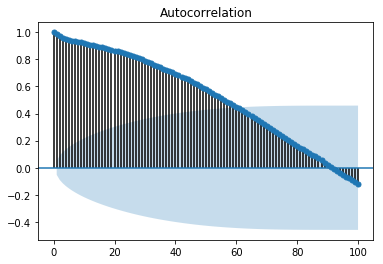

In [80]:
plot_acf(data['temp'], lags = 100)

In [96]:
cols = data.columns
for i in range(60):
    for col in cols:
        data["lag_" + col + str(i)] = data[col].shift(i)
data = data.dropna()

In [97]:
train = data[:1390]
test = data[1390:]

In [98]:
X = train.drop(["temp"], axis=1).values
Y = train["temp"].values

model = sm.OLS(Y, X)
results = model.fit()

In [99]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.665e+29
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        20:47:12   Log-Likelihood:                 42556.
No. Observations:                1341   AIC:                        -8.439e+04
Df Residuals:                     981   BIC:                        -8.252e+04
Df Model:                         360                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -1.18e-16   1.97e-16     -0.598      0.550   -5.05e-16    2.69e-16
x2          2.894e-15   2.36e-16     12.241      0.000    2.43e-15    3.36e-15
x3         -4.278e-15   1.29e-16    -33.150      0.000   -4.53e-15   -4.02e-15
x4         -3.709e-15   9.51e-17    -38.983      0.000    -3.9e-15   -3.52e-15
x5         -1.266e-15   1.22e-16    -10.376      0.000   -1.51e-15   -1.03e-15
x6             1.0000   1.16e-15    8.6e+14      0.000       1.000       1.000
x7          2.415e-15   1.97e-16     12.239      0.000    2.03e-15     2.8e-15
x8           2.54e-15   2.36e-16     10.744      0.000    2.08e-15       3e-15
x9          3.785e-15   1.29e-16     29.332      0.000    3.53e-15    4.04e-15
x10         4.597e-15   9.51e-17     48.319      0.000    4.41e-15    4.78e-15
x11        -5.135e-16   1.22e-16     -4.207      0.000   -7.53e-16   -2.74e-16
x12        -1.568e-15   1.78e-15     -0.881      0.378   -5.06e-15    1.92e-15
x13         -2.22e-15   5.16e-16     -4.305      0.000   -3.23e-15   -1.21e-15
x14        -6.661e-16   5.72e-16     -1.165      0.244   -1.79e-15    4.56e-16
x15        -3.088e-16   2.75e-16     -1.123      0.262   -8.49e-16    2.31e-16
x16        -1.683e-16   1.99e-16     -0.847      0.397   -5.58e-16    2.21e-16
x17        -1.041e-17   2.75e-16     -0.038      0.970    -5.5e-16    5.29e-16
x18        -1.443e-15   1.84e-15     -0.783      0.434   -5.06e-15    2.18e-15
x19        -4.163e-16   5.21e-16     -0.799      0.424   -1.44e-15    6.06e-16
x20        -8.776e-16   5.73e-16     -1.530      0.126      -2e-15    2.48e-16
x21         1.422e-16   2.74e-16      0.519      0.604   -3.96e-16     6.8e-16
x22         8.327e-17   1.99e-16      0.419      0.675   -3.07e-16    4.73e-16
x23         8.327e-17   2.75e-16      0.303      0.762   -4.56e-16    6.23e-16
x24         1.679e-15   1.85e-15      0.910      0.363   -1.94e-15     5.3e-15
x25         4.302e-16   5.21e-16      0.826      0.409   -5.92e-16    1.45e-15
x26         1.079e-15   5.74e-16      1.879      0.061   -4.78e-17    2.21e-15
x27        -4.441e-16   2.75e-16     -1.614      0.107   -9.84e-16    9.57e-17
x28         -1.05e-16   1.99e-16     -0.528      0.598   -4.95e-16    2.85e-16
x29        -8.674e-17   2.74e-16     -0.316      0.752   -6.25e-16    4.51e-16
x30        -1.887e-15   1.84e-15     -1.026      0.305    -5.5e-15    1.72e-15
x31         4.857e-16   5.22e-16      0.931      0.352   -5.38e-16    1.51e-15
x32        -1.003e-15   5.75e-16     -1.745      0.081   -2.13e-15    1.25e-16
x33         1.223e-16   2.76e-16      0.443      0.658   -4.19e-16    6.64e-16
x34         1.041e-17      2e-16      0.052      0.959   -3.82e-16    4.03e-16
x35        -1.093e-16   2.74e-16     -0.398      0.690   -6.48e-16    4.29e-16
x36         2.248e-15   1.83e-15      1.226      0.221   -1.35e-15    5.85e-15
x3

In [100]:
pred = model.predict(test.drop(["temp"], axis=1).values.T)

In [101]:
pred 

array([], shape=(1341, 0), dtype=float64)

## T-test

Last two winters were warmer compared to previous ones.  
Let's check this hypothesis using T-test, and see if there is a significant difference in means.  

In [3]:
df = pd.DataFrame({"winter_2015" : data["2015-12-01":"2016-02-28"].temp.values,
                    "winter_2016" : data["2016-12-01":"2017-02-28"].temp.values,
                    "winter_2017" : data["2017-12-01":"2018-02-28"].temp.values,
                    "winter_2018" : data["2018-12-01":"2019-02-28"].temp.values
})

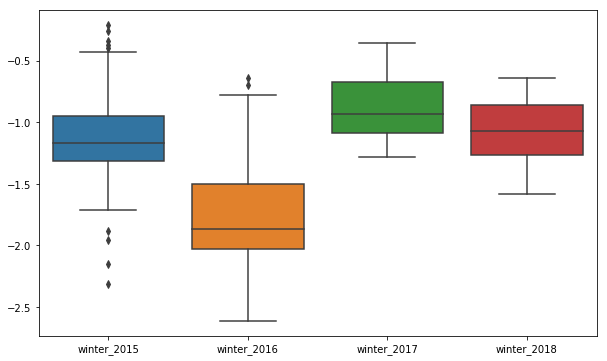

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df)
plt.savefig("fig3.png")

In [6]:
df.var().round(2)

winter_2015    0.15
winter_2016    0.19
winter_2017    0.07
winter_2018    0.06
dtype: float64

In [7]:
df.mean().round(2)

winter_2015   -1.12
winter_2016   -1.78
winter_2017   -0.88
winter_2018   -1.07
dtype: float64

In [143]:
from scipy import stats

In [155]:
print("T-test for 2016 vs 2018: ", stats.ttest_rel(df.winter_2016, df.winter_2018))
print("T-test for 2015 vs 2018: ", stats.ttest_rel(df.winter_2015, df.winter_2018))
print("T-test for 2016 vs 2017: ", stats.ttest_rel(df.winter_2016, df.winter_2017))
print("T-test for 2015 vs 2017: ", stats.ttest_rel(df.winter_2015, df.winter_2017))

T-test for 2016 vs 2018:  Ttest_relResult(statistic=-14.733557601172304, pvalue=1.3398051269676616e-25)
T-test for 2015 vs 2018:  Ttest_relResult(statistic=-1.2090098086430627, pvalue=0.22986117321652397)
T-test for 2016 vs 2017:  Ttest_relResult(statistic=-15.528599651195524, pvalue=4.5544444136548364e-27)
T-test for 2015 vs 2017:  Ttest_relResult(statistic=-6.619789406459984, pvalue=2.630251457706028e-09)


There is significant difference in means for years 2016 vs 2018, 2016 vs 2017.  

In [154]:
print("Shapiro test for 2018 vs 2016", stats.shapiro(df.winter_2018 - df.winter_2016))
print("Shapiro test for 2017 vs 2015", stats.shapiro(df.winter_2017 - df.winter_2015))
print("Shapiro test for 2018 vs 2015", stats.shapiro(df.winter_2018 - df.winter_2015))
print("Shapiro test for 2017 vs 2016", stats.shapiro(df.winter_2017 - df.winter_2016))

Shapiro test for 2018 vs 2016 (0.9885522723197937, 0.6245923638343811)
Shapiro test for 2017 vs 2015 (0.9389685988426208, 0.0003709469747263938)
Shapiro test for 2018 vs 2015 (0.9703464508056641, 0.03740397468209267)
Shapiro test for 2017 vs 2016 (0.9649539589881897, 0.015771985054016113)


Differences are normally distributed for 2018 vs 2016. 